# A data analisys of the Montgomery County, PA [911 calls](https://www.kaggle.com/mchirico/montcoalert)

* By: Mateus Mendes Ramalho da Silva 
1.     mateus.mendes.mmr@gmail.com

Importing python libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Loading dataset on a dataframe:

In [2]:
df=pd.read_csv('../input/montcoalert/911.csv')

Checking head of the dataset:

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Checking infos about the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Top 10 zip codes on 911 calls:

In [5]:
df['zip'].value_counts().head(10)


19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: zip, dtype: int64

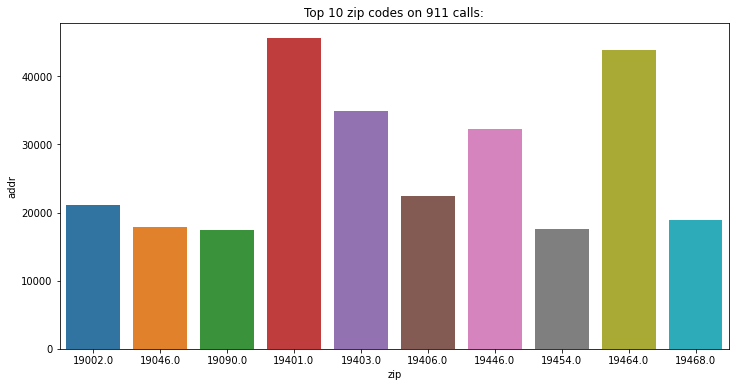

In [6]:
by_zip = df.groupby(['zip']).count()
by_zip.sort_values(by='addr', ascending=False, inplace=True)
by_zip = by_zip.head(10)
plt.figure(figsize=(12,6))
plt.title('Top 10 zip codes on 911 calls:')
sns.barplot(x='zip', y='addr', data=by_zip.reset_index()) 


Top 10 cities on 911 calls:

In [7]:
df['twp'].value_counts().head(10)

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

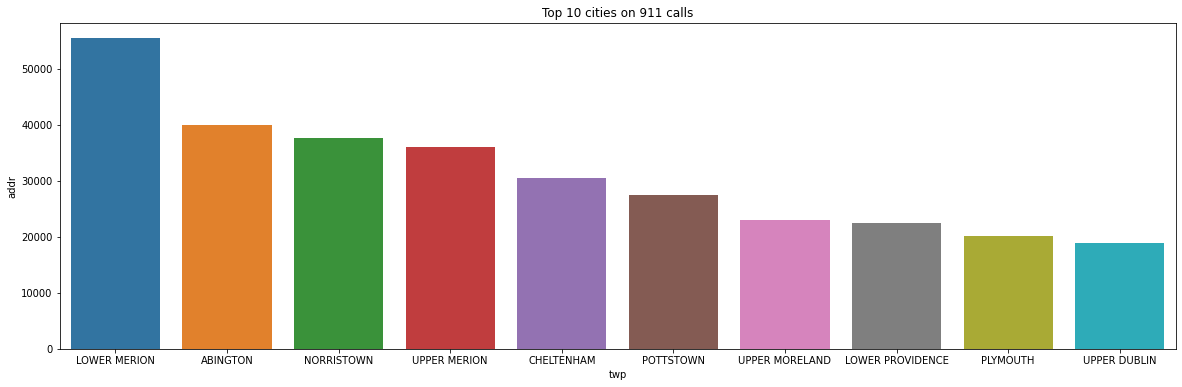

In [8]:
by_twp = df.groupby(['twp']).count()
by_twp.sort_values(by='addr', ascending = False, inplace=True)
by_twp = by_twp.head(10)
plt.figure(figsize=(20,6))
plt.title('Top 10 cities on 911 calls')
sns.barplot(x='twp', y='addr', data=by_twp.reset_index())

In the title there are three main kinds of reasons of the emergency, they are EMS, Fire and Traffic. Let's create a new column containing just the reasons of each occurrence, without the descriptions. This may help to mantain the code more clean and make easier to get some insights. 

Getting the slice of the tittles and putting in a new columns called 'reason':

In [9]:
reasons = df['title'].apply(lambda reason: reason.split(':')[0])
df['reason'] = reasons
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Which one of the reasons is the most common one:

In [10]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

Answer : EMS is the most common

Let's show it graphically:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfbabce518>],
      dtype=object)

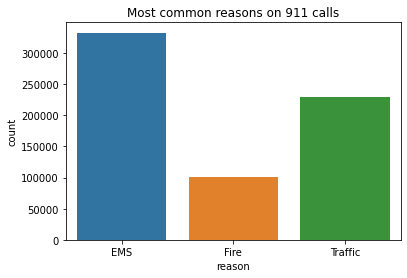

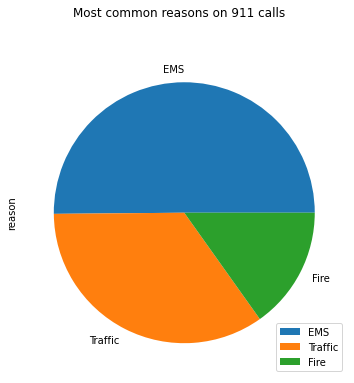

In [11]:
plt.title("Most common reasons on 911 calls")
sns.countplot(x='reason', data=df) 
c_reasons = df['reason'].value_counts().to_frame() # Converting the series into a dataframe:
c_reasons.plot(kind='pie', subplots=True, figsize=(6,6), title="Most common reasons on 911 calls")

Let's now get some informations related to time. We need now to convert the string on the 'timeStamp' column on a dateTime format

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp']) # Converting by the to_datetime()

By doing this, we can now extract some very useful and especific information from the timeStamp.
Like:

Hour:

In [13]:
df['timeStamp'].iloc[0].hour

17

Month:

In [14]:
df['timeStamp'].iloc[0].month

12

Day of the week:

In [15]:
df['timeStamp'].iloc[0].dayofweek

3

Year:

In [16]:
df['timeStamp'].iloc[0].year

2015

Let's now add the hour, month and dayofweek columns on the dataframe:

In [17]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['year'] = df['timeStamp'].apply(lambda time: time.year)

Checking dataframe:

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek,month,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,3,12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,3,12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,3,12,2015


Have you noticed something weird? Yes, exactly. The day of the week is a number, to improve this we are going to need to create a dictionary with the name of the days of the week and apply to the column using the map() function:

In [19]:
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [20]:
df['dayofweek'] = df['dayofweek'].map(days)

Checking:

In [21]:
df['dayofweek']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
663517    Wed
663518    Wed
663519    Wed
663520    Wed
663521    Wed
Name: dayofweek, Length: 663522, dtype: object

Let's now finally get some informations from the timeStamp:

911 Calls by day of week:

In [22]:
df['dayofweek'].value_counts()

Fri    102942
Wed     99157
Thu     98683
Tue     97684
Mon     96745
Sat     89452
Sun     78859
Name: dayofweek, dtype: int64

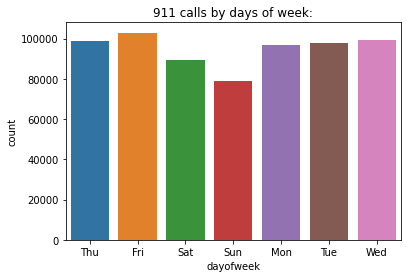

In [23]:
plt.title("911 calls by days of week:")
sns.countplot(x='dayofweek', data=df)

We can notice that the day with more 911 calss is friday and the one with less is sunday.

Dividing also by reason:

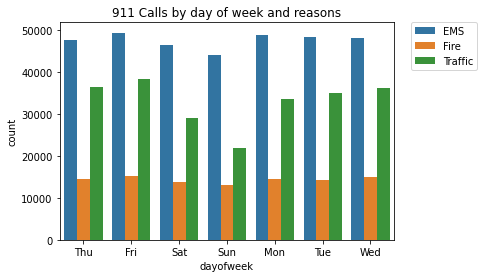

In [24]:
plt.title('911 Calls by day of week and reasons')
sns.countplot(x='dayofweek', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

911 Calls by month:

Text(0.5, 1.0, '911 calls by month')

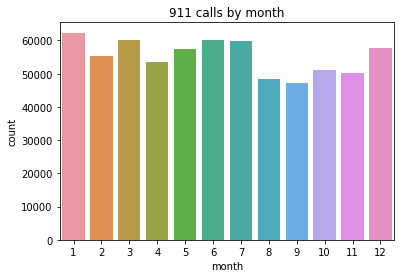

In [25]:
sns.countplot(x='month', data=df)
plt.title("911 calls by month")

We can notice that the calls are more present in January and december

By the way, we can also change the month number into the month name in order to get a better description:

In [26]:
months = {1:'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_mn = df.copy() # Just making a copy to preserve temporal order on future insights
df_mn['month'] = df_mn['month'].map(months)

Let's Check:

In [27]:
df_mn['month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
663517    Jul
663518    Jul
663519    Jul
663520    Jul
663521    Jul
Name: month, Length: 663522, dtype: object

Now the visualization:

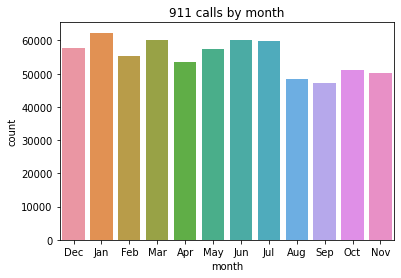

In [28]:
plt.title("911 calls by month")
sns.countplot(x='month', data=df_mn)

Now let's divide by reason:

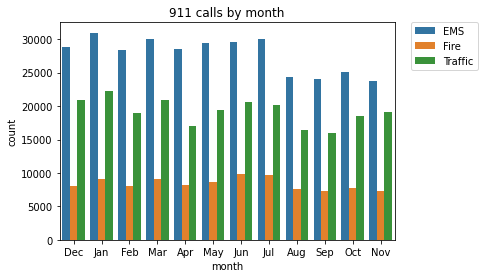

In [29]:
plt.title("911 calls by month")
sns.countplot(x='month', data=df_mn, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Let's now check by years:

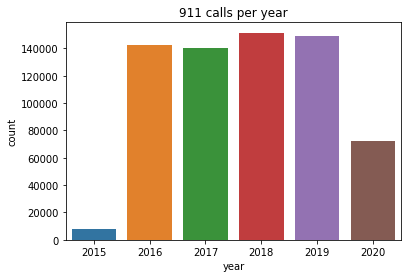

In [30]:
plt.title("911 calls per year")
sns.countplot(x='year', data=df)

Now with the reasons:

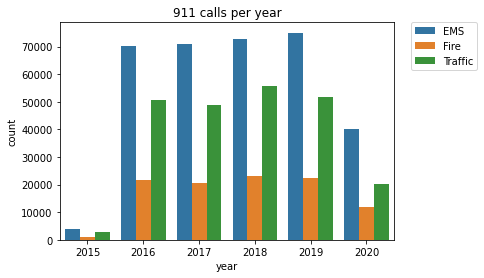

In [31]:
plt.title("911 calls per year")
sns.countplot(x='year', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Question**: Why does 2015 have less data than other years?

Let's check the months to see if the data spreads through all the year:

In [32]:
df_2015 = df[df['year'] == 2015]
df_2015['month'].value_counts()

12    7916
Name: month, dtype: int64

**Answer**: The data from 215 correspond just to december**

Let's make some different and interesting plots now:

Let's first agroup the data by month

In [33]:
by_month = df.groupby(['month']).count()

In [34]:
by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek,year
month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


Let's visualize the data

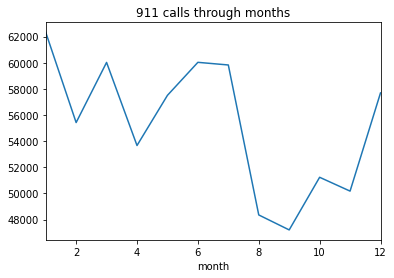

In [35]:
by_month['addr'].plot(title="911 calls through months")

Let's see it year by year:

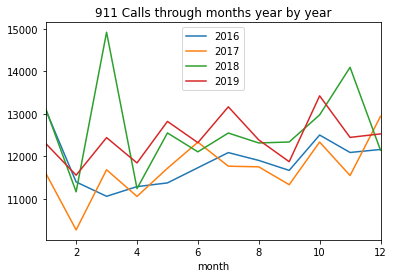

In [36]:
a_2016 = df[df['year']==2016].groupby(['month']).count()
a_2017 = df[df['year']==2017].groupby(['month']).count()
a_2018 = df[df['year']==2018].groupby(['month']).count()
a_2019 = df[df['year']==2019].groupby(['month']).count()
a_2016['addr'].plot(legend=True)
a_2017['addr'].plot()
a_2018['addr'].plot()
a_2019['addr'].plot()
plt.title("911 Calls through months year by year")
plt.legend(['2016','2017','2018','2019'])

Now let's see on a linear model plot:

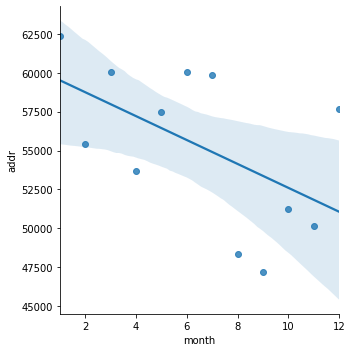

In [37]:
sns.lmplot(x='month', y='addr', data=by_month.reset_index())

Now let's take a look in a line insight using the reason:

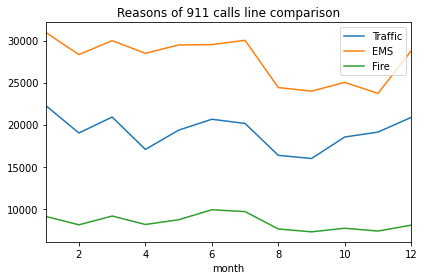

In [38]:
df[df['reason'] == 'Traffic'].groupby(['month']).count()['addr'].plot()
df[df['reason'] == 'EMS'].groupby(['month']).count()['addr'].plot()
df[df['reason'] == 'Fire'].groupby(['month']).count()['addr'].plot()
plt.title('Reasons of 911 calls line comparison')
plt.legend(['Traffic','EMS', 'Fire'])
plt.tight_layout()

Now let's create some heatmaps using the hour and the day of week:

In [39]:
day_hour = df.groupby(['dayofweek', 'hour']).count()['reason'].unstack()
day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Question:** in which days and which hours happen most of the calls?

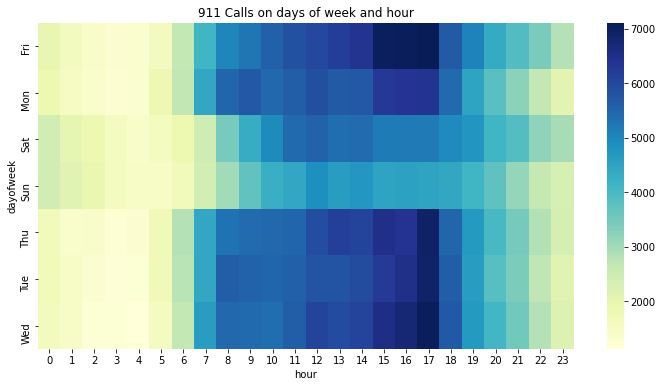

In [40]:
plt.figure(figsize=(12,6))
plt.title("911 Calls on days of week and hour")
sns.heatmap(day_hour, cmap='YlGnBu')

**Answer:** We can notice that most of the calls happens between 15 pm and 18 pm, mainly 17 pm. The most common day are fridays, we can also say that in the weeknds there less calls than in the other days.

Let's also see a clustermap:

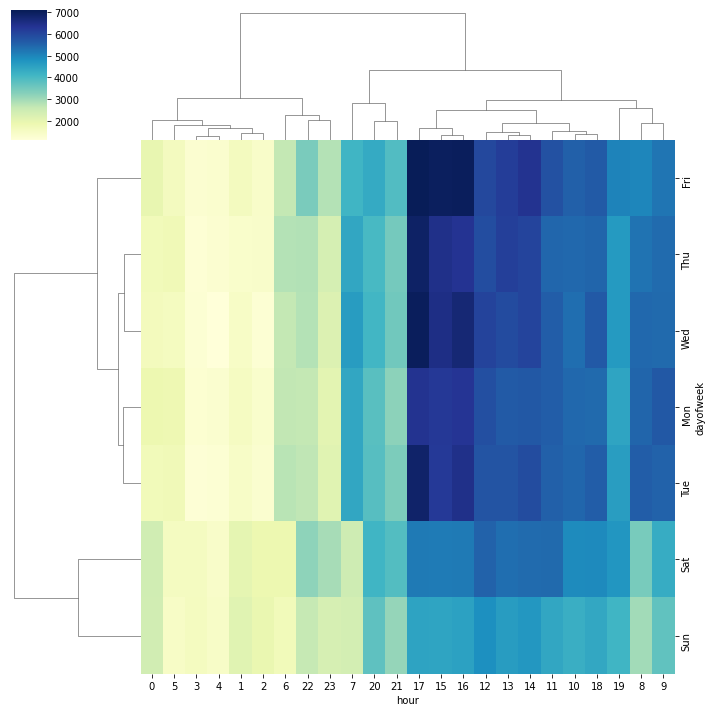

In [41]:
sns.clustermap(day_hour, cmap='YlGnBu')

Let's also relate the days of week and months:

In [42]:
day_month = df.groupby(['dayofweek', 'month']).count()['reason'].unstack()
day_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
dayofweek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


**Question:** In which day of which month there are concentrated more calls?

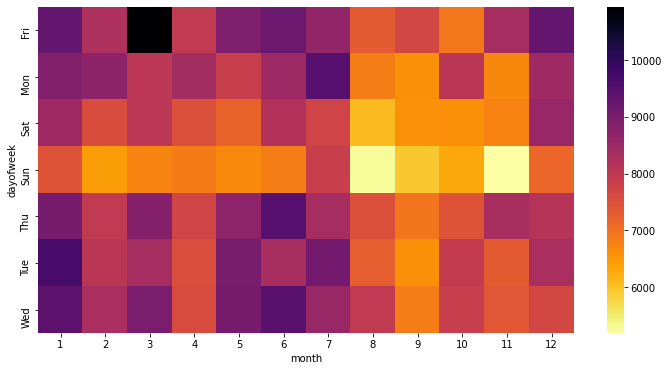

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month, cmap="inferno_r")

**Answer**: We can notice that most of the calls happen on the fridays of march. We can also notice a great amount on the Tuesdays of january.

Let's also see a clustermap:

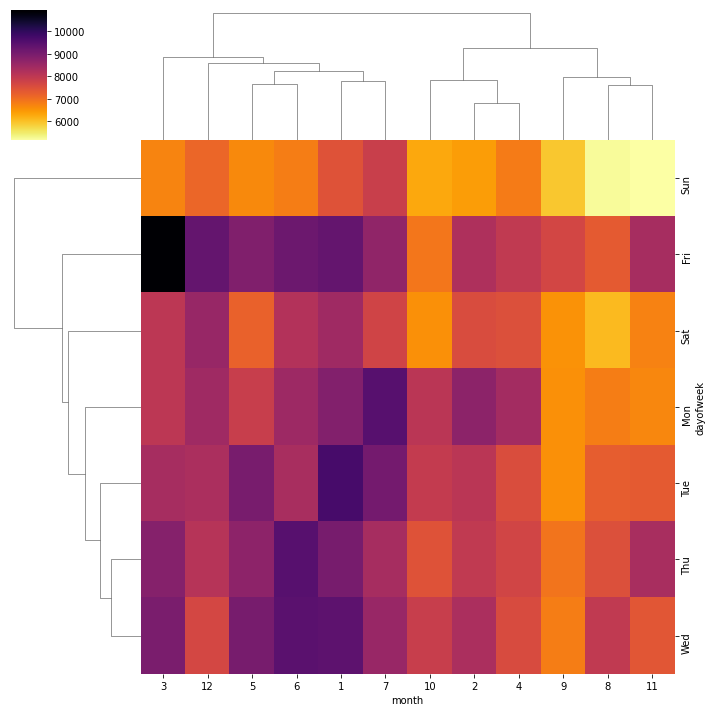

In [44]:
sns.clustermap(day_month, cmap='inferno_r')